In [1]:
from __future__ import absolute_import, division, print_function,unicode_literals
import functools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.precision", 2)

In [3]:
# Reason of absence categories
reason_for_absence_dict = {
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood',
    4: 'Metabolic diseases',
    5: 'Mental disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms not elsewhere classified',
    19: 'Injury',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status',
    22: 'patient follow-up',
    23: 'medical consultation',
    24: 'blood donation',
    25: 'laboratory examination',
    26: 'unjustified absence',
    27: 'physiotherapy',
    28: 'dental consultation'
}
corelation_columns = [
    'Month of absence',
    'Day of the week',
    'Seasons',
    'Transportation expense',
    'Distance from Residence to Work',
    'Service time',
    'Age',
    'Education',
    'Son',
    'Social drinker',
    'Social smoker',
    'Pet',
    'Weight',
    'Height',
    'Body mass index',
    'Absenteeism time in hours'
]
all_data = pd.read_csv('./dataset/Absenteeism_at_work.csv', sep=';')
# Move week day number to 1-5 instead of 2-6
all_data['Day of the week'] = all_data['Day of the week'].apply(lambda x: x-1)
# Map seasons to 1 sprint -> 4 winter
all_data['Seasons'] = all_data['Seasons'].apply(lambda x: 1 if x == 4 else x + 1)
# Remove data if numver of hours is 0
all_data = all_data[all_data['Absenteeism time in hours'] != 0]

In [4]:
all_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,2,2,289,36,13,33,239.55,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,3,2,179,51,18,38,239.55,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,4,2,279,5,14,39,239.55,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,4,2,289,36,13,33,239.55,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,5,2,179,51,18,38,239.55,...,0,1,0,1,0,0,89,170,31,2


Text(0.5, 0, 'Reason for absence')

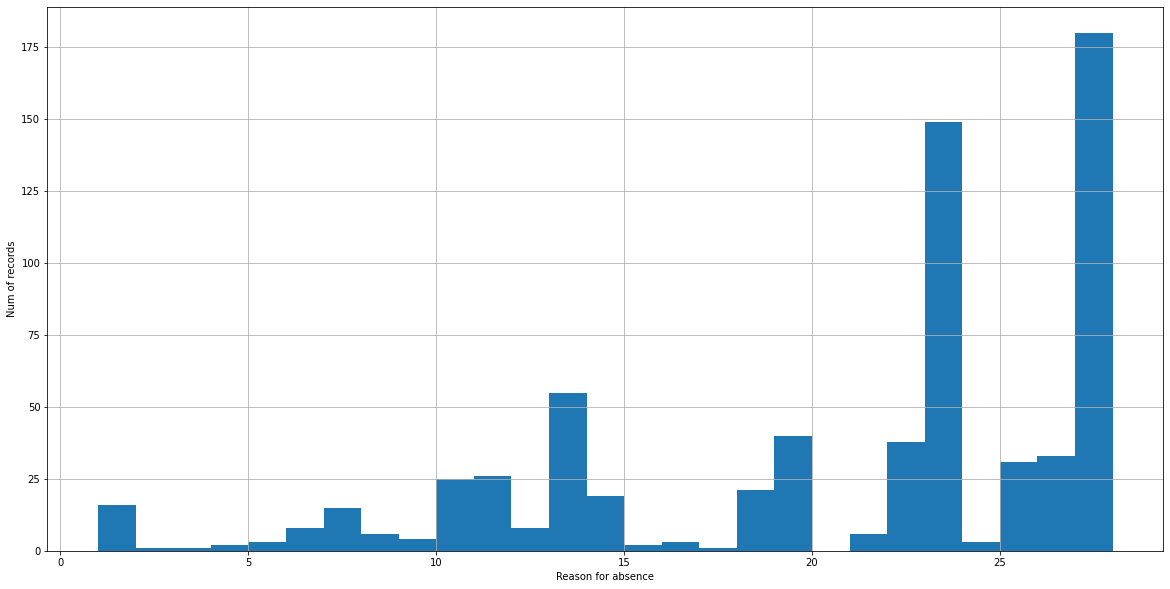

In [5]:
plt.figure(figsize=(20, 10))
all_data['Reason for absence'].hist(bins=27)
plt.ylabel('Num of records')
plt.xlabel('Reason for absence')

Text(0.5, 0, 'Month of absence')

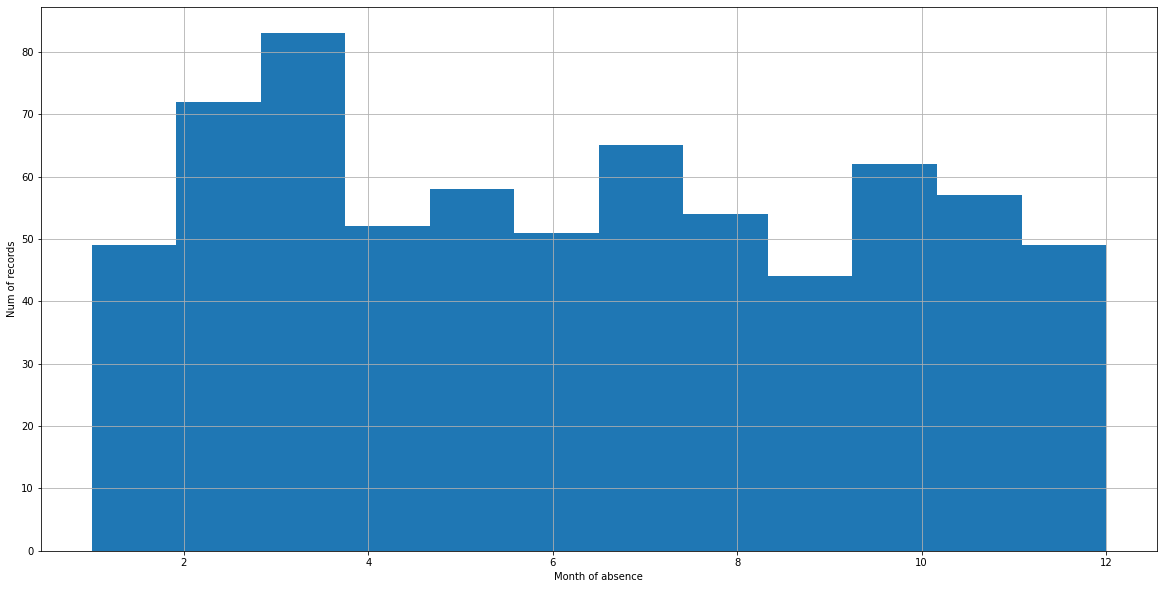

In [6]:
plt.figure(figsize=(20, 10))
all_data['Month of absence'].hist(bins=12)
plt.ylabel('Num of records')
plt.xlabel('Month of absence')

Text(0.5, 0, 'Day of the week')

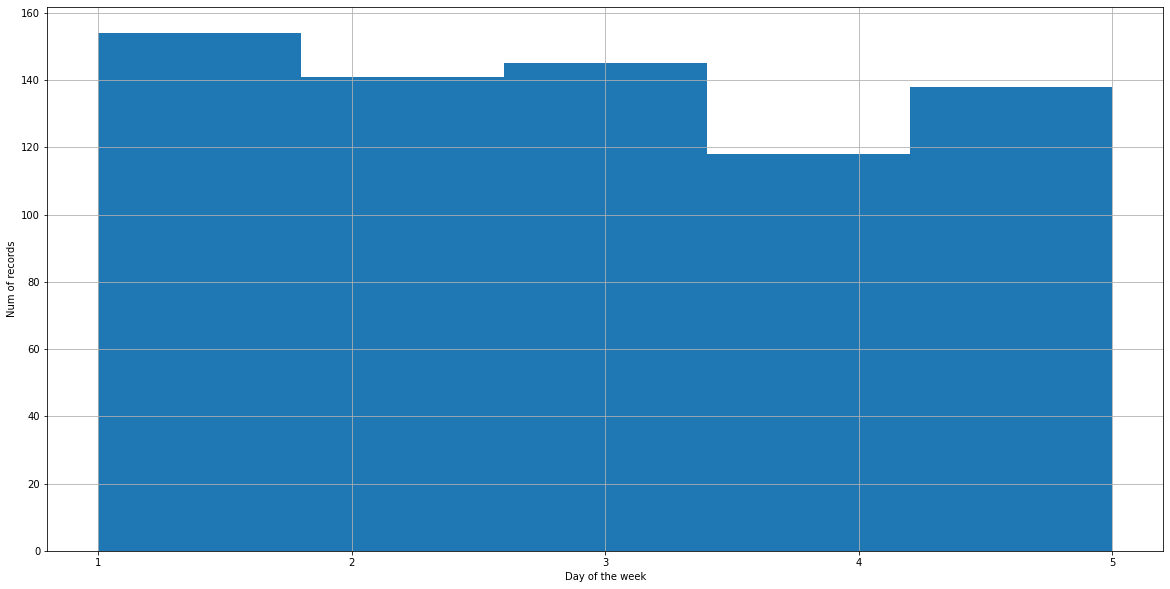

In [7]:
plt.figure(figsize=(20, 10))
all_data['Day of the week'].hist(bins=5)
temp = plt.xticks(np.arange(1, 6, step=1.0))
plt.ylabel('Num of records')
plt.xlabel('Day of the week')

Text(0.5, 0, 'Seasons')

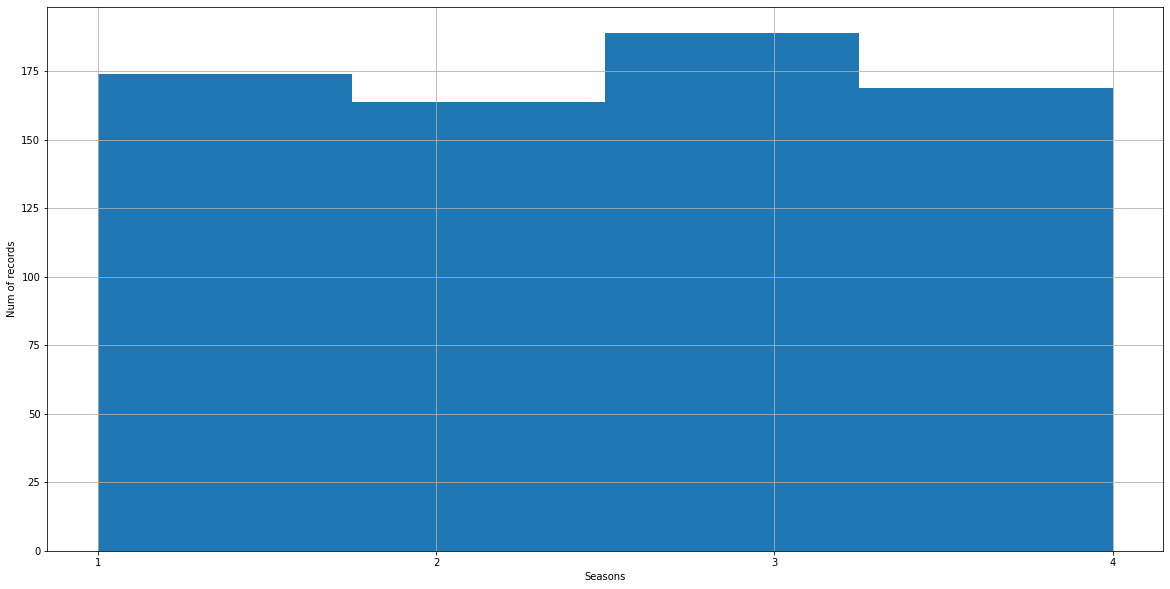

In [8]:
plt.figure(figsize=(20, 10))
all_data['Seasons'].hist(bins=4)
temp = plt.xticks(np.arange(1, 5, step=1.0))
plt.ylabel('Num of records')
plt.xlabel('Seasons')

Text(0.5, 0, 'Service time')

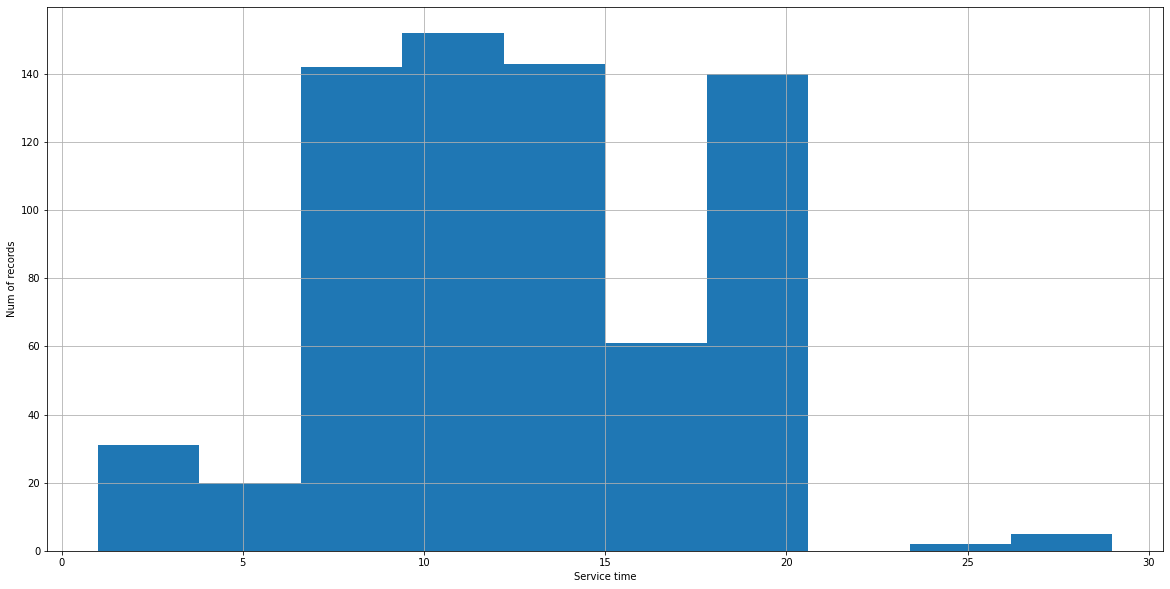

In [9]:
plt.figure(figsize=(20, 10))
all_data['Service time'].hist()
plt.ylabel('Num of records')
plt.xlabel('Service time')

Text(0.5, 0, 'Age')

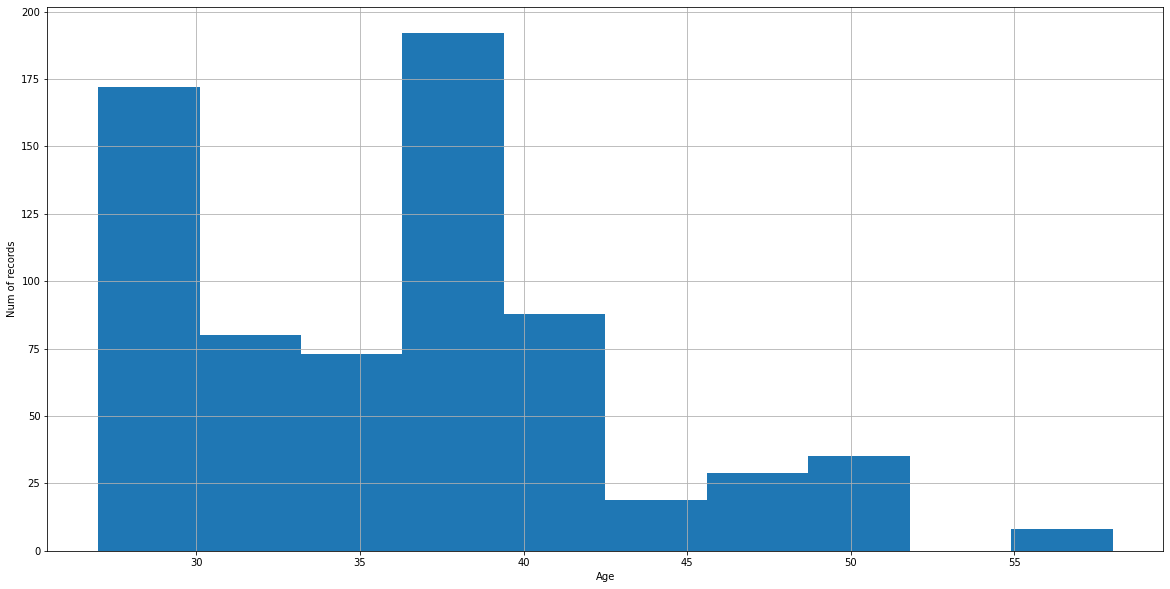

In [10]:
plt.figure(figsize=(20, 10))
all_data['Age'].hist()
plt.ylabel('Num of records')
plt.xlabel('Age')

Text(0.5, 0, 'Education')

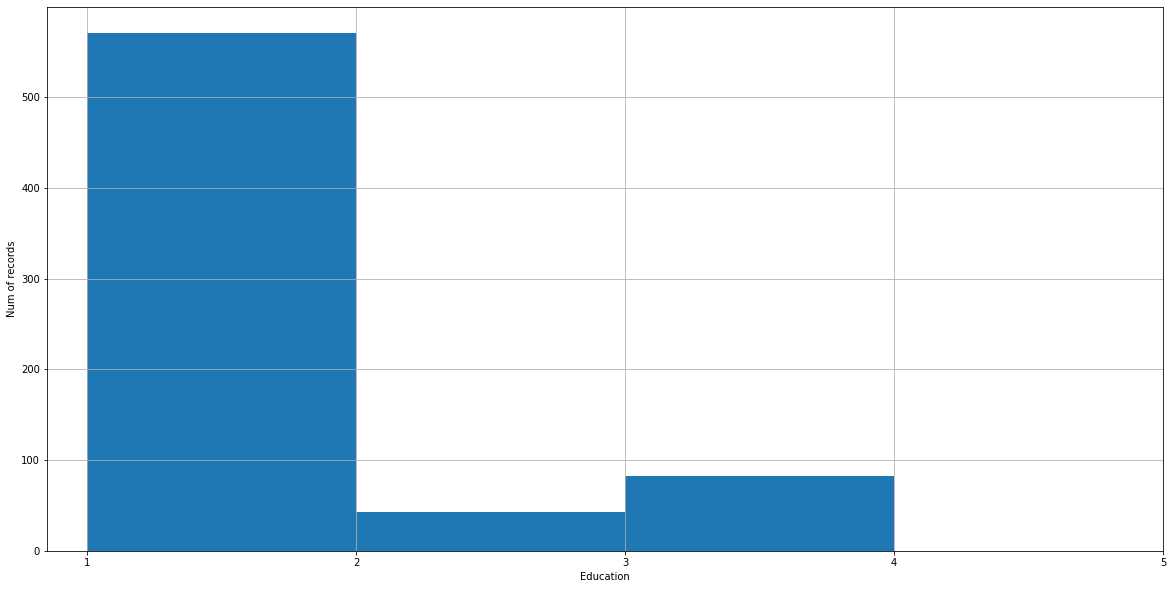

In [11]:
plt.figure(figsize=(20, 10))
all_data['Education'].hist(bins=3)
temp = plt.xticks(np.arange(1, 6, step=1.0))
plt.ylabel('Num of records')
plt.xlabel('Education')

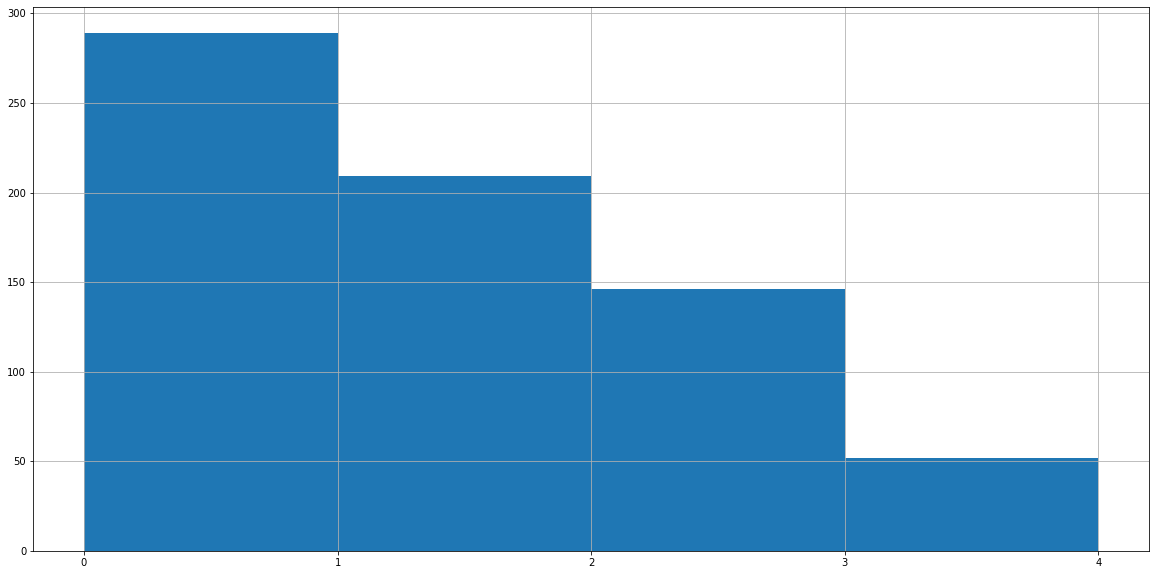

In [12]:
plt.figure(figsize=(20, 10))
all_data['Son'].hist(bins=4)
temp = plt.xticks(np.arange(0, 5, step=1.0))

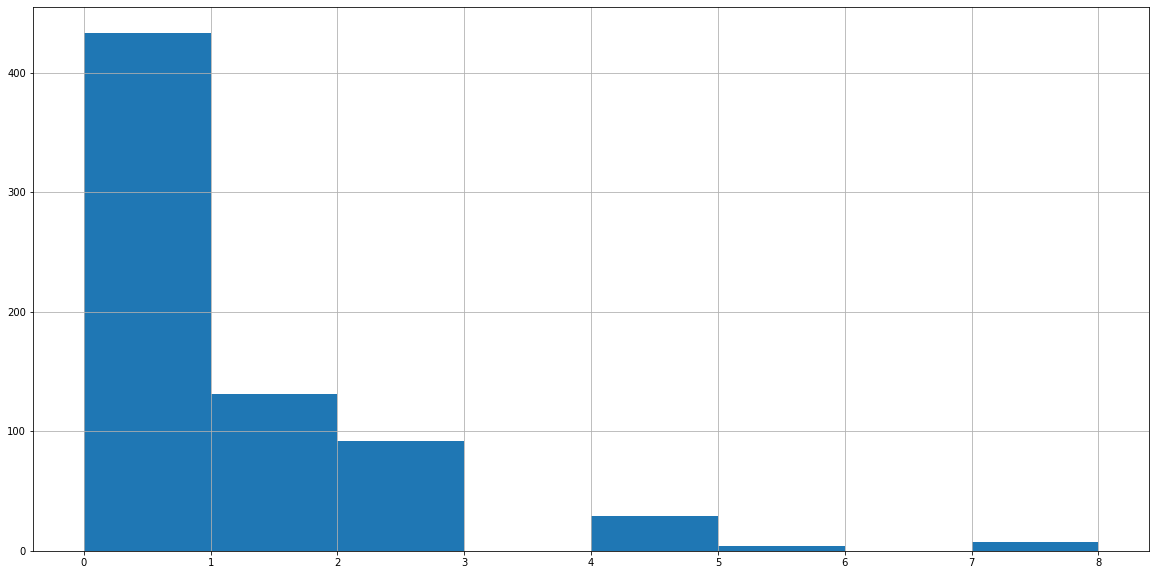

In [13]:
plt.figure(figsize=(20, 10))
all_data['Pet'].hist(bins=8)
temp = plt.xticks(np.arange(0, 9, step=1.0))

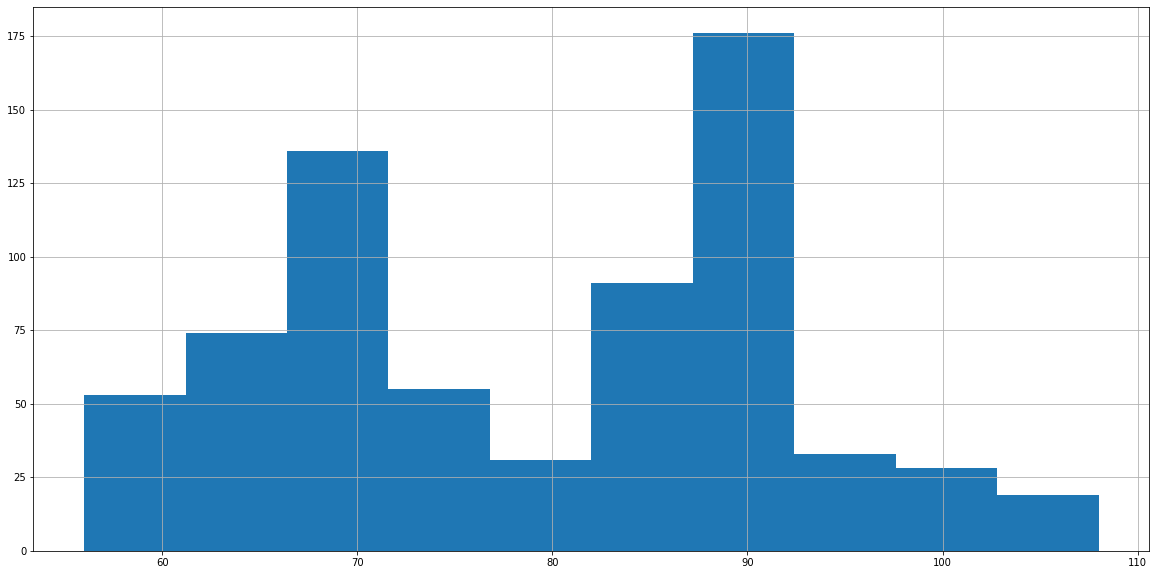

In [14]:
plt.figure(figsize=(20, 10))
all_data['Weight'].hist()

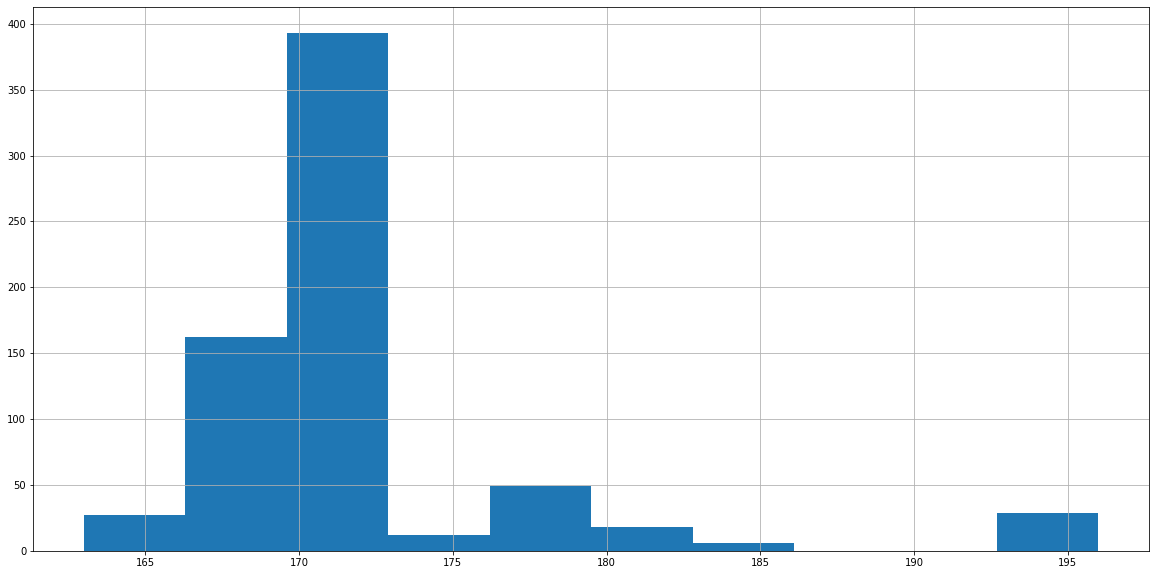

In [15]:
plt.figure(figsize=(20, 10))
all_data['Height'].hist()

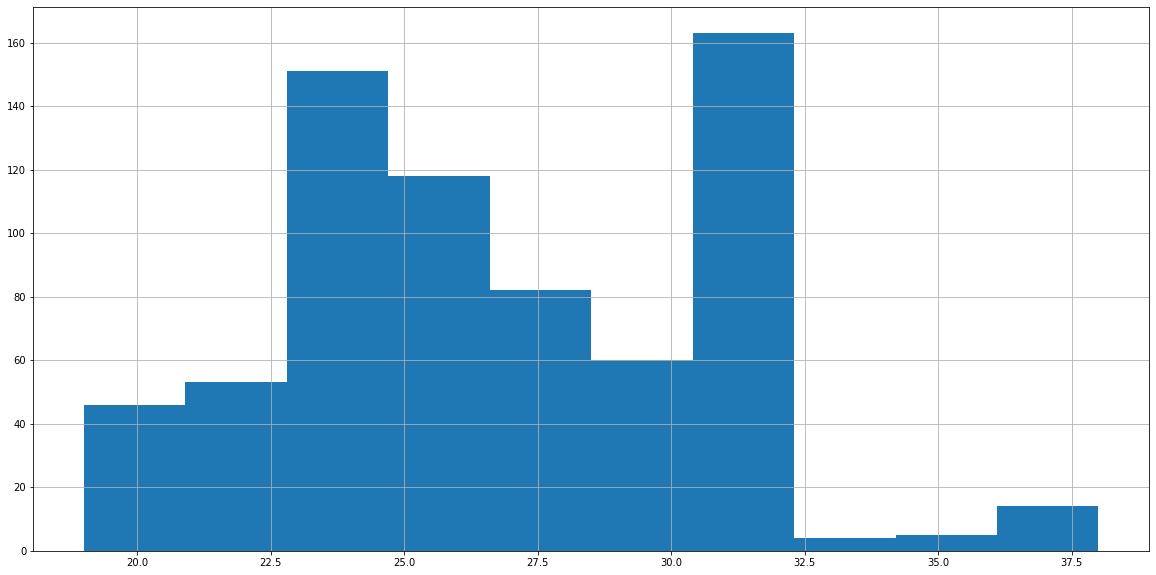

In [16]:
plt.figure(figsize=(20, 10))
all_data['Body mass index'].hist()

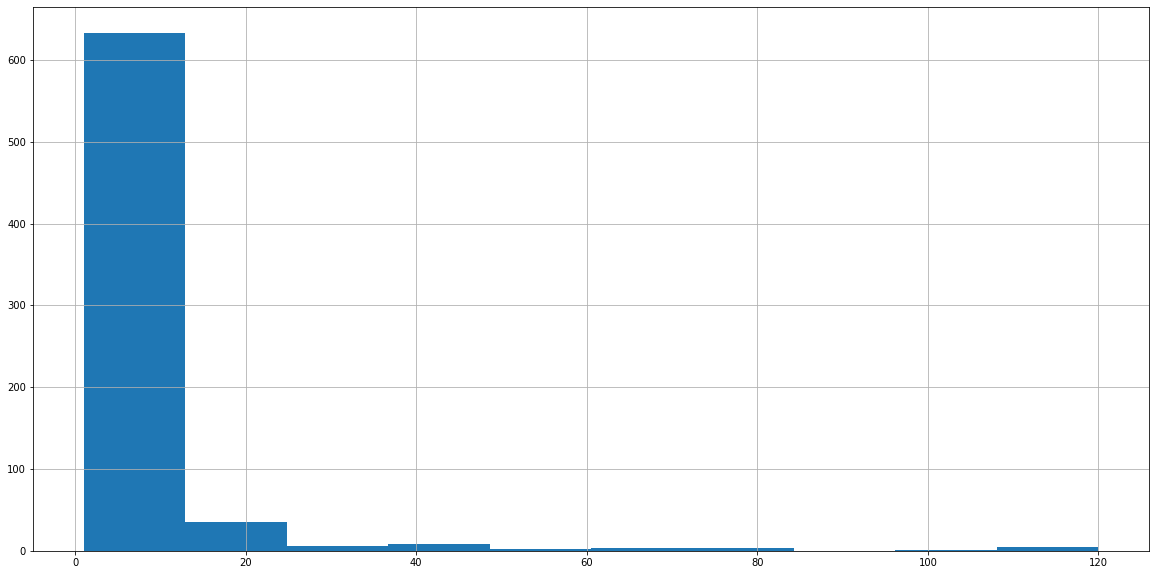

In [17]:
plt.figure(figsize=(20, 10))
all_data['Absenteeism time in hours'].hist()

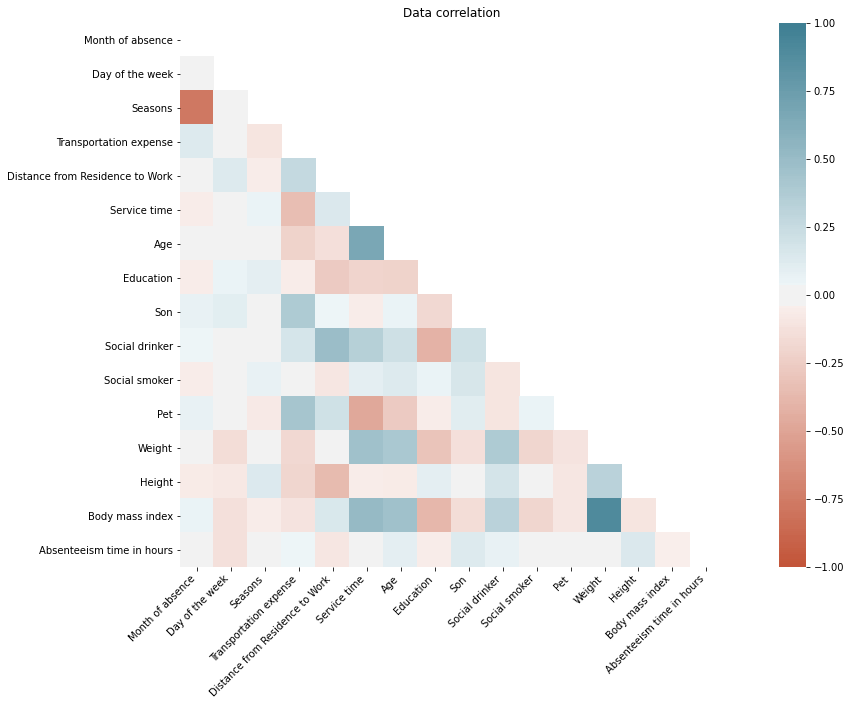

In [18]:
corr = all_data[corelation_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
corr,
mask=mask,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True
)
ax.set_title('Data correlation')
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);

Day of the week                   -1.31e-01
Distance from Residence to Work   -9.99e-02
Education                         -5.61e-02
Body mass index                   -3.95e-02
Pet                               -2.29e-02
Social smoker                      5.24e-03
Service time                       1.97e-02
Seasons                            2.83e-02
Weight                             2.87e-02
Month of absence                   3.39e-02
Transportation expense             4.08e-02
Social drinker                     7.39e-02
Age                                8.60e-02
Son                                1.28e-01
Height                             1.47e-01
Name: Absenteeism time in hours, dtype: float64


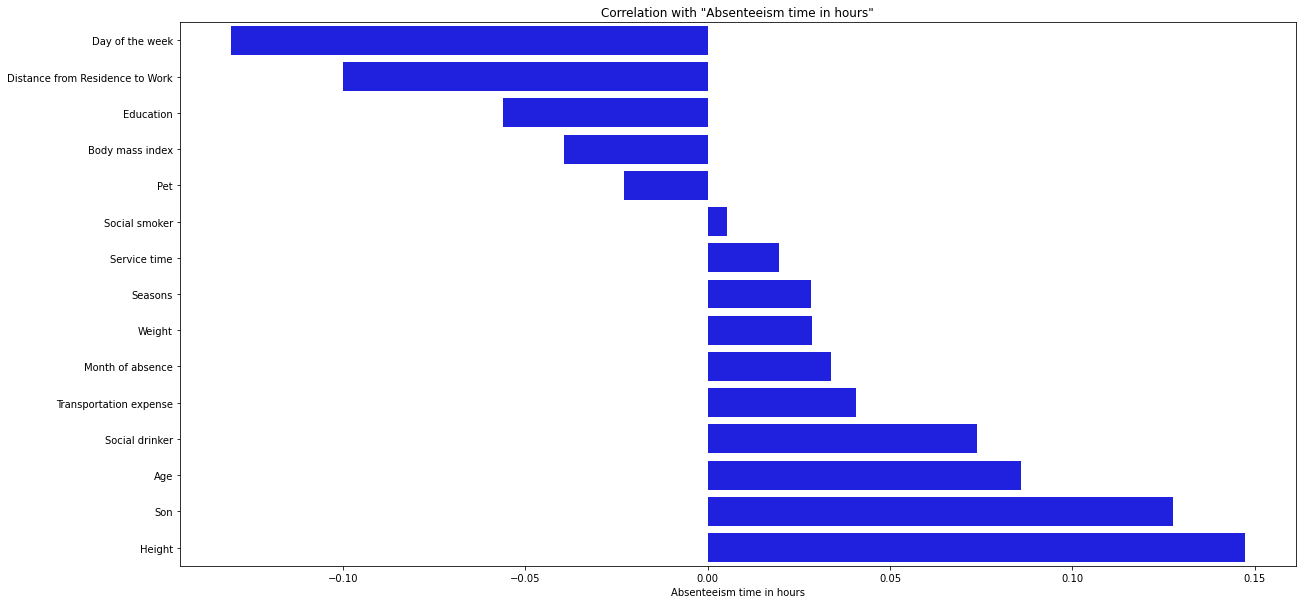

In [19]:
sorted_y = corr.sort_values(by='Absenteeism time in hours', axis=0).drop('Absenteeism time in hours')
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=sorted_y["Absenteeism time in hours"], y=sorted_y.index,color="b")
ax.set_title('Correlation with "Absenteeism time in hours"')
print(sorted_y["Absenteeism time in hours"])

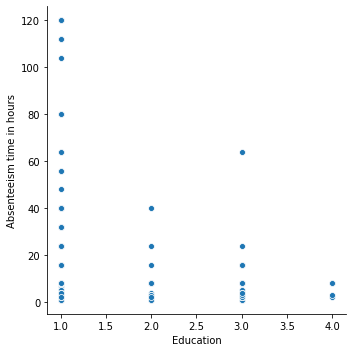

In [20]:
sns.relplot(x="Education", y="Absenteeism time in hours",data=all_data);

In [21]:
sns.barplot(x="Social drinker", y="Absenteeism time in hours", data=comp)

NameError: name 'comp' is not defined